In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mlxtend.evaluate import confusion_matrix

In [3]:
dataset = pd.read_csv("final_dataset.csv")
dataset['labels'].loc[dataset['labels'] == 0] = -1 

C:\Users\DEEP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
dataset

,created_at,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day,labels
0,2020-06-18 23:29:49,1,20.6875,47.49635,99,2907.74194,22.5000,25.9,0.2946,8,2020,6,18,1
1,2020-06-18 23:30:58,2,20.6250,47.52944,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,1
2,2020-06-18 23:32:06,3,20.6250,47.55913,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,1
3,2020-06-18 23:33:15,4,20.5625,47.59531,99,2912.90332,22.5000,26.0,0.2946,8,2020,6,18,1
4,2020-06-18 23:34:23,5,20.4375,47.60892,99,2911.61279,22.4375,26.0,0.2946,8,2020,6,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375198,2021-07-26 19:11:20,380357,26.1250,88.10663,100,2925.48389,24.9375,16.4,1.6400,0,2021,7,26,-1
375199,2021-07-26 19:12:30,380358,26.0625,88.35374,100,2874.19360,24.9375,16.4,1.6400,0,2021,7,26,-1
375200,2021-07-26 19:13:40,380359,26.0625,88.63950,100,2889.67749,24.9375,16.4,1.6400,0,2021,7,26,-1
375201,2021-07-26 19:14:49,380360,25.9375,88.89094,100,3067.41943,24.8750,16.3,1.6300,0,2021,7,26,-1


In [5]:
(375202 - dataset.labels.value_counts()[1])/375202

0.49882196789995786

In [6]:
dataset.describe()

,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day,labels
count,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000,375203.000000
mean,187954.605379,8.081033,70.621098,83.555259,2153.046284,8.518032,16.207222,0.131424,1.999030,2020.426982,6.616466,15.901592,0.002353
std,108727.439759,10.824139,9.059883,31.173823,1109.555632,10.223571,8.605845,0.234788,2.599934,0.494640,3.609852,8.717034,0.999999
min,1.000000,-16.812500,13.198580,0.000000,-297.741940,-11.312500,-2.300000,-0.000220,0.000000,2020.000000,1.000000,1.000000,-1.000000
25%,93801.500000,-0.687500,65.889270,84.000000,1524.516110,-0.312500,12.200000,0.001890,0.000000,2020.000000,3.000000,9.000000,-1.000000
50%,187603.000000,6.750000,72.104680,100.000000,2702.903320,7.062500,17.900000,0.030620,0.000000,2020.000000,7.000000,16.000000,1.000000
75%,282023.500000,17.562500,77.293620,100.000000,2999.032230,18.125000,22.600000,0.218020,3.000000,2021.000000,10.000000,23.000000,1.000000
max,385630.000000,49.812500,102.060900,100.000000,3281.612790,42.125000,36.000000,1.650000,8.000000,2021.000000,12.000000,31.000000,1.000000


In [7]:
df1 = dataset.iloc[:, [2,3,5,6,7,8]]
pca = PCA()
X_train = pca.fit_transform(df1)
true_labels = np.array(dataset.iloc[:, 13])

In [8]:
acc = []
f1 = []
prec = []
rec = []

model = OneClassSVM(nu = 1e-08, gamma = 0.00000121)
model.fit(X_train)
ocsvm_labels = model.predict(X_train)
acc.append(accuracy_score(true_labels, ocsvm_labels))
f1.append(f1_score(true_labels, ocsvm_labels))
prec.append(precision_score(true_labels, ocsvm_labels))
rec.append(recall_score(true_labels, ocsvm_labels))

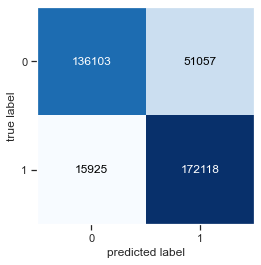

In [9]:
cm = confusion_matrix(y_target=true_labels, y_predicted=ocsvm_labels)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

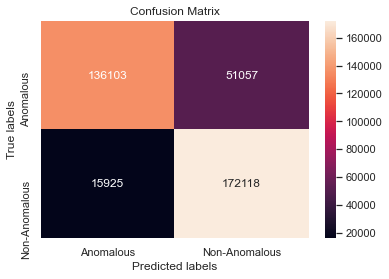

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Anomalous', 'Non-Anomalous']); ax.yaxis.set_ticklabels(['Anomalous', 'Non-Anomalous']);

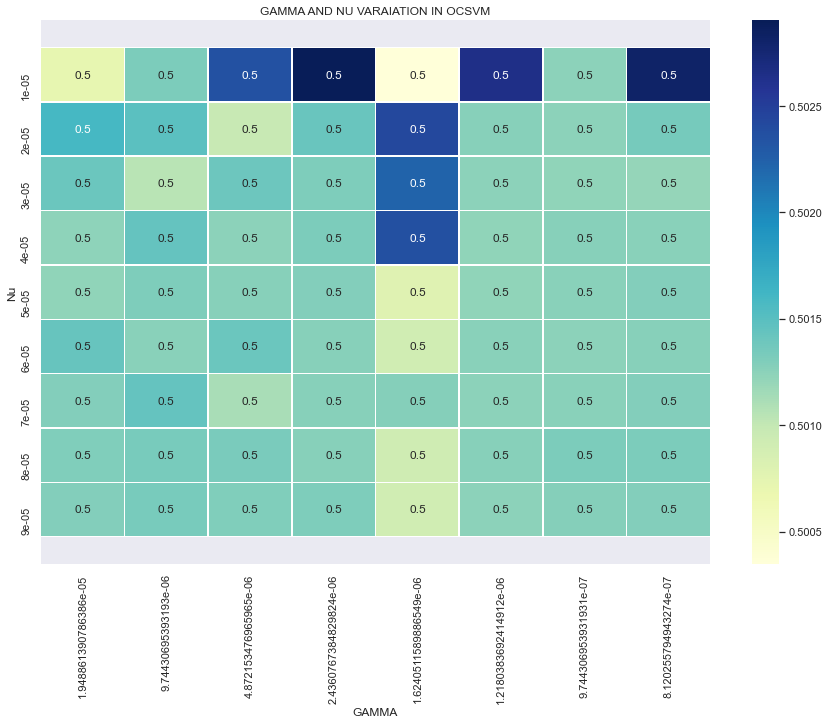

In [27]:
nu_value = [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05]
gamma_val = [4.0/(X_train.var()), 2.0/(X_train.var()), 1.0/(X_train.var()), 1.0/(2*X_train.var()), 1.0/(3*X_train.var()), 1.0/(4*X_train.var()), 1.0/(5*X_train.var()), 1.0/(6*X_train.var())]

acc = []
f1 = []
prec = []
rec = []
for i in nu_value:
    for j in gamma_val:
        model = OneClassSVM(nu = i, gamma = j)
        model.fit(X_train)
        ocsvm_labels = model.predict(X_train)
        acc.append(accuracy_score(true_labels, ocsvm_labels))
        f1.append(f1_score(true_labels, ocsvm_labels))
        prec.append(precision_score(true_labels, ocsvm_labels))
        rec.append(recall_score(true_labels, ocsvm_labels))

acc = np.array(acc)
f1 = np.array(f1)
acc = acc.reshape(len(nu_value), len(gamma_val))
f1 = f1.reshape(len(nu_value), len(gamma_val))
df = pd.DataFrame(acc, index = nu_value, columns = gamma_val)

plt.figure(figsize=(15,10))
sns.heatmap(df, annot = True, linewidth = 0.5, cmap = "YlGnBu")
plt.xlabel("GAMMA")
plt.ylabel("Nu")
plt.title("GAMMA AND NU VARAIATION IN OCSVM")


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [28]:
acc.shape

(9, 8)

In [29]:
acc = acc.reshape(72,)

In [30]:
np.mean(acc)

0.5013695919275699

Text(0, 0.5, 'Accuracy')

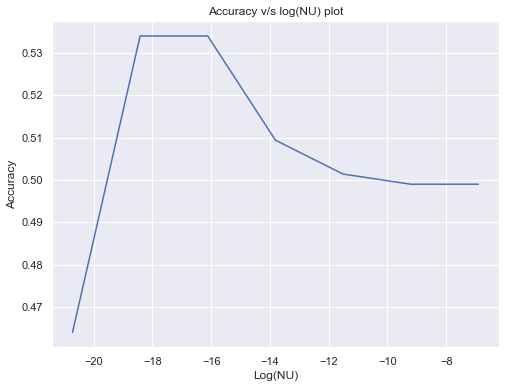

In [40]:
plt.figure(figsize=(8,6))
final = [0.464, 0.534, 0.534, 0.5094, 0.5014, 0.499, 0.499]
x = [10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3]
plt.plot(np.log(x), final)
plt.title("Accuracy v/s log(NU) plot")
plt.xlabel("Log(NU)")
plt.ylabel("Accuracy")

In [34]:
10**-9

1e-09

NameError: name 'OneClassSVM' is not defined